# Possible questions that could be answered are:

How does the funding ecosystem change with time?

Do states play a major role in funding?

Which sectors are favored by the FNE for funding?

What is the most favored business type in the Northeast Ecosystem?

How much funds does generally get in Northeast regions?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.ticker as ticker
import folium
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [4]:
filename = r"C:\Users\ninol\Desktop\PROFESSIONAL\DATA_STORAGE\FUNDO_NE\FNE_ALL_CLEAN.csv"

filename_cities = r"C:\Users\ninol\Desktop\PROFESSIONAL\DATA_STORAGE\FUNDO_NE\Cities_geospacial\municipality_lat_long.csv"
    
df = pd.read_csv(filename, encoding='utf-8')

df.head()

,HIRE_DATE,CONTRACT_NUMBER,MUNICIPALITY_CODE,STATE,URBAN_RURAL,LEGALENTITY_PHYSICALENTITY,BUSINESS_SIZE,SECTOR,CONTRACT_VALUE
0,2000-12-27T00:00:00,001.XXXX.A000118201.XXX,2613909.0,PE,Rural,PHY_E,Mini,Livestock,27140.55
1,2000-12-28T00:00:00,001.XXXX.A000118401.XXX,2601805.0,PE,Rural,PHY_E,Mini,Livestock,11000.00
2,2000-03-21T00:00:00,001.XXXX.A000009901.XXX,2401008.0,RN,Rural,PHY_E,Mini,Livestock,11295.27
3,2000-05-30T00:00:00,001.XXXX.A000013301.XXX,2404903.0,RN,Rural,PHY_E,Mini,Livestock,8408.16
4,2000-06-28T00:00:00,001.XXXX.A000014301.XXX,2401008.0,RN,Rural,PHY_E,Mini,Agriculture,11555.89


In [5]:
# let's Look for unique values in each column:
print('Output:\n\n')
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}' column:")
    print(unique_values)
    print()

Output:


Unique values in 'HIRE_DATE' column:
['2000-12-27T00:00:00' '2000-12-28T00:00:00' '2000-03-21T00:00:00' ...
 '13/08/2020' '27/01/2020' '30/12/2022']

Unique values in 'CONTRACT_NUMBER' column:
['001.XXXX.A000118201.XXX' '001.XXXX.A000118401.XXX'
 '001.XXXX.A000009901.XXX' ... '001.XXXX.C000129602.XXX'
 '001.XXXX.C100202502.XXX' '002.XXXX.C000001102.XXX']

Unique values in 'MUNICIPALITY_CODE' column:
[2613909. 2601805. 2401008. ... 3120839. 3170057. 3161650.]

Unique values in 'STATE' column:
['PE' 'RN' 'PB' 'PI' 'CE' 'BA' 'SE' 'AL' 'MA' 'MG' 'ES' 'RJ']

Unique values in 'URBAN_RURAL' column:
['Rural' 'Urban']

Unique values in 'LEGALENTITY_PHYSICALENTITY' column:
['PHY_E' 'LEGAL_E']

Unique values in 'BUSINESS_SIZE' column:
['Mini' 'Small' 'Medium' 'Large' 'Micro' 'Medium-Large' 'Mini/Micro'
 'Small-Medium' 'Medium I' 'Medium II']

Unique values in 'SECTOR' column:
['Livestock' 'Agriculture' 'Agroindustry' 'Industry' 'Services' 'Commerce'
 'Infrastructure' 'Commerce and Servi

In [9]:
# After using the unique method , one thing noticed was the incorrect number
# of states, Brazilian northeast region only has 9 states. After some research in this matter, I've found that
# the National Northeast Bank is subordinate to Federal Bank Instances. Even tho it's kind of weird finding
# this values here, Dunno if this was the case, but the respective Federal Bodies can lend loans in the name of FNE.

# Transforming the date column in date type so we can use dt method
df['HIRE_DATE'] = pd.to_datetime(df['HIRE_DATE'])

# Removing states and years that are out of our planned scope:

excluded_states = ['MG', 'ES', 'RJ']   # ->>>> Are not part of NORTHEAST states
df = df[~df['STATE'].isin(excluded_states)]

exclude_years = [1996, 1999, 1995, 2020]     # ->>>> 1996 and 1999 were not from the expected years, and 2020 would prob
                                             #       give us outlying values due to covid's financial supportive iniciatives
         
df = df[~df['HIRE_DATE'].dt.year.isin(exclude_years)]

In [10]:
print('Output:\n\n', df.shape)

Output:

 (8004731, 9)


In [11]:
print('Output:\n\n')
df.info()

Output:


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8004731 entries, 0 to 8832949
Data columns (total 9 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   HIRE_DATE                   datetime64[ns]
 1   CONTRACT_NUMBER             object        
 2   MUNICIPALITY_CODE           float64       
 3   STATE                       object        
 4   URBAN_RURAL                 object        
 5   LEGALENTITY_PHYSICALENTITY  object        
 6   BUSINESS_SIZE               object        
 7   SECTOR                      object        
 8   CONTRACT_VALUE              float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 610.7+ MB


In [12]:
df.dropna(subset=['CONTRACT_VALUE'], inplace=True)

<Axes: xlabel='CONTRACT_VALUE', ylabel='Density'>

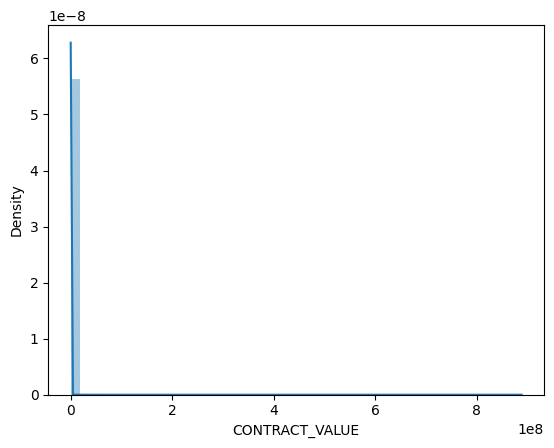

In [13]:
sns.distplot(df['CONTRACT_VALUE'])

<Axes: xlabel='Contract_log', ylabel='Density'>

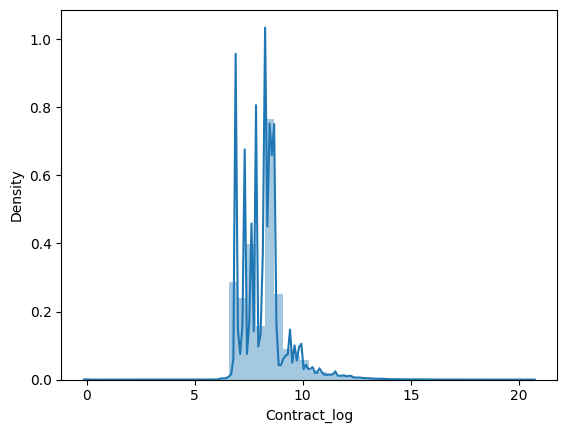

In [14]:
df['Contract_log'] = np.log(df['CONTRACT_VALUE']+1)
sns.distplot(df['Contract_log'])

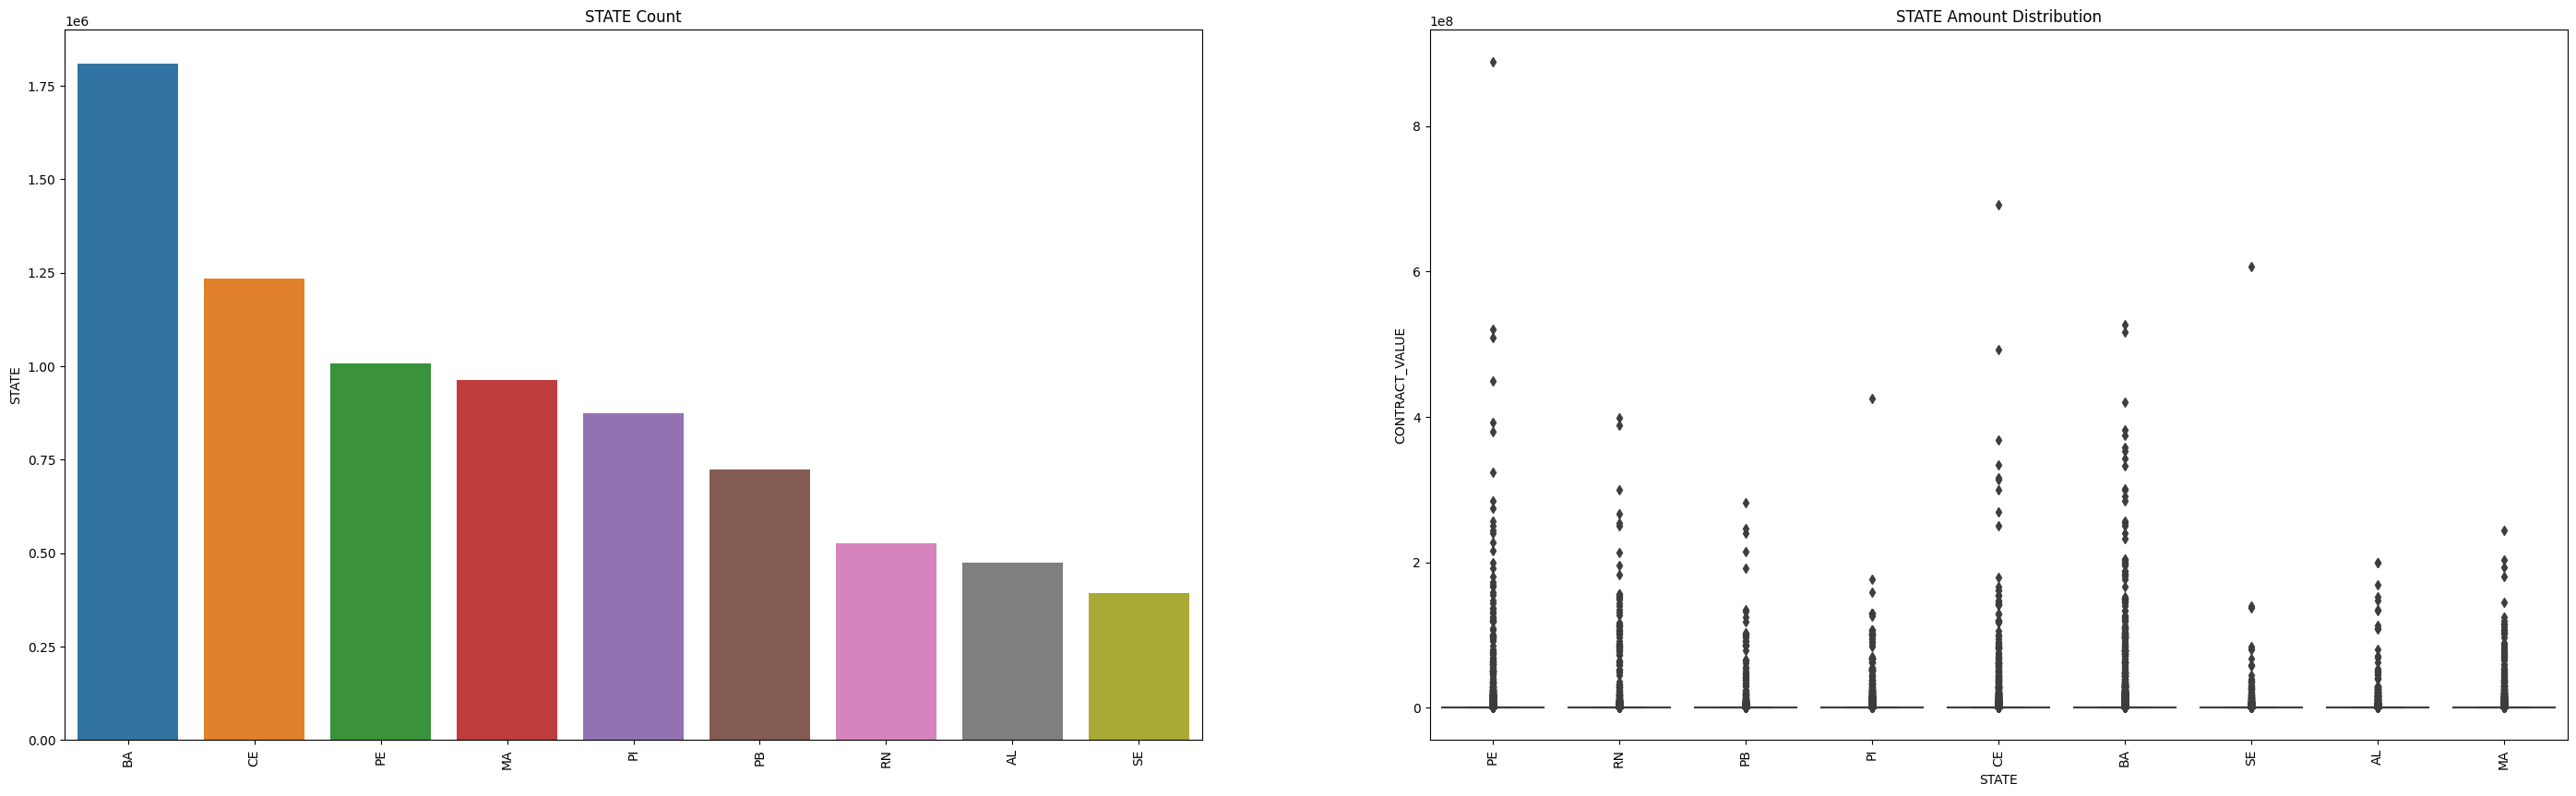

In [15]:
city = df['STATE'].value_counts().to_frame().head(20)

plt.figure(figsize=(35, 10))

plt.subplot(1, 2, 1)
sns.barplot(data=city, x=city.index, y='STATE')
plt.title('STATE Count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
df1 = df[df['STATE'].isin(city.index)]
sns.boxplot(data=df1, x='STATE', y='CONTRACT_VALUE')  # Fixed the y-axis parameter
plt.title('STATE Amount Distribution')
plt.xticks(rotation=90)

plt.show()

# Time series analysis 



In [16]:
df.rename(columns={'HIRE_DATE':'Date'},inplace=True)

In [17]:
df['Date'].replace(('12/05.2015', '13/04.2015','15/01.2015','22/01//2015'),
                   ('12/05/2015','13/04/2015','15/01/2015','22/01/2015'),inplace=True)
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
df['Month'] = df['Date'].dt.to_period('M')
df['Year'] = df['Date'].dt.to_period('A')
df.head(3)

,Date,CONTRACT_NUMBER,MUNICIPALITY_CODE,STATE,URBAN_RURAL,LEGALENTITY_PHYSICALENTITY,BUSINESS_SIZE,SECTOR,CONTRACT_VALUE,Contract_log,Month,Year
0,2000-12-27,001.XXXX.A000118201.XXX,2613909.0,PE,Rural,PHY_E,Mini,Livestock,27140.55,10.208821,2000-12,2000
1,2000-12-28,001.XXXX.A000118401.XXX,2601805.0,PE,Rural,PHY_E,Mini,Livestock,11000.00,9.305741,2000-12,2000
2,2000-03-21,001.XXXX.A000009901.XXX,2401008.0,RN,Rural,PHY_E,Mini,Livestock,11295.27,9.332228,2000-03,2000


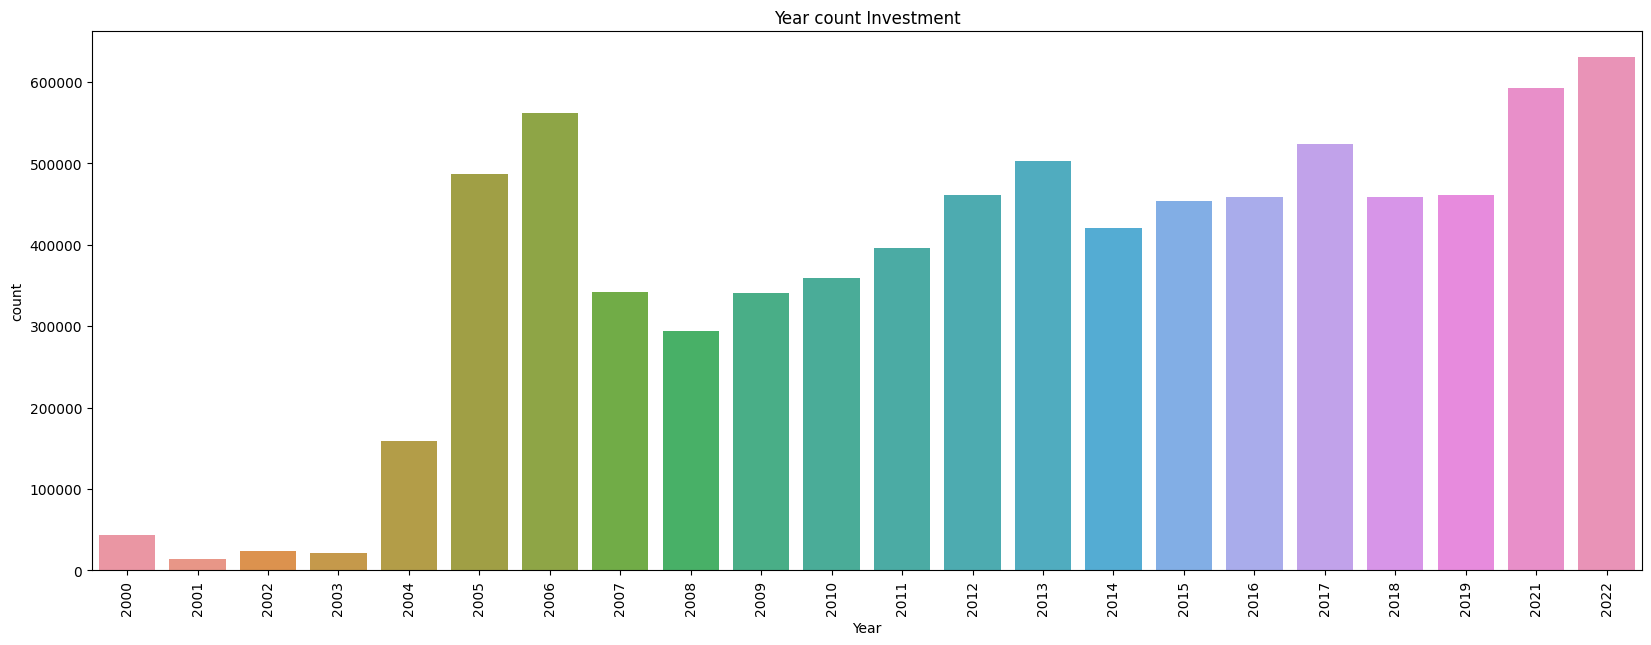

In [18]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,x='Year')
plt.title('Year count Investment')
plt.xticks(rotation=90)
plt.show()

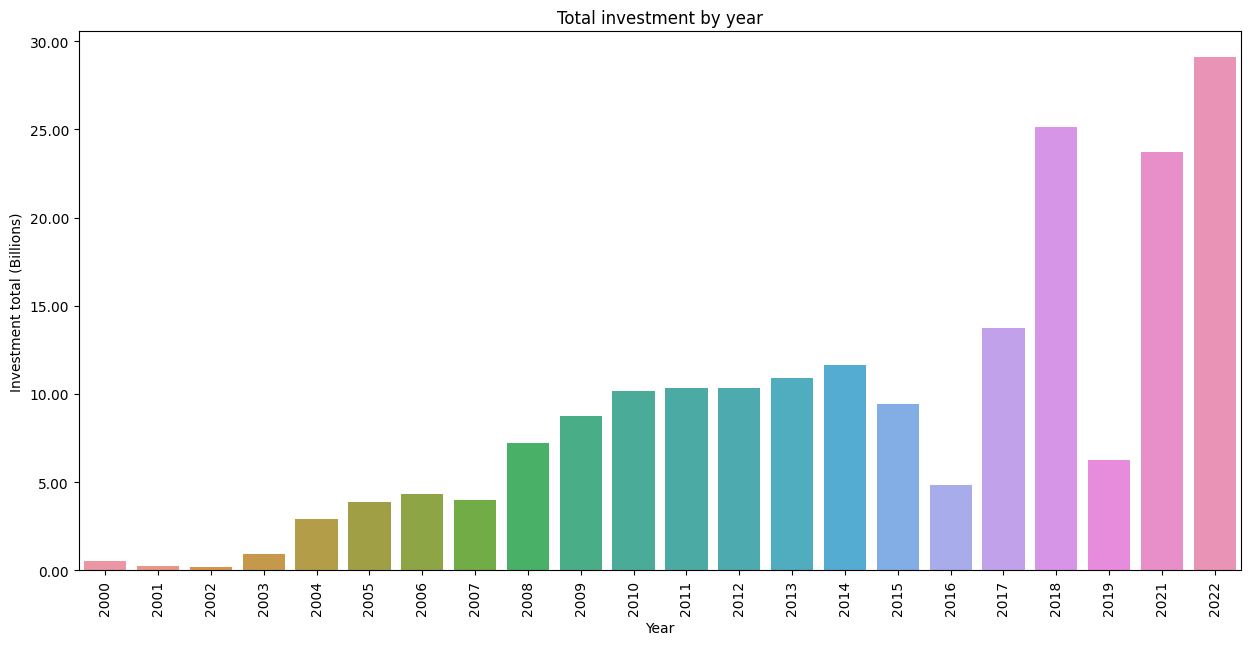

In [19]:
yearly_sum = df.groupby('Year')['CONTRACT_VALUE'].sum().reset_index()


plt.figure(figsize=(15, 7))
ax = sns.barplot(data=yearly_sum, x='Year', y='CONTRACT_VALUE')
plt.title('Total investment by year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Investment total (Billions)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e9:.2f}')) 
plt.show()

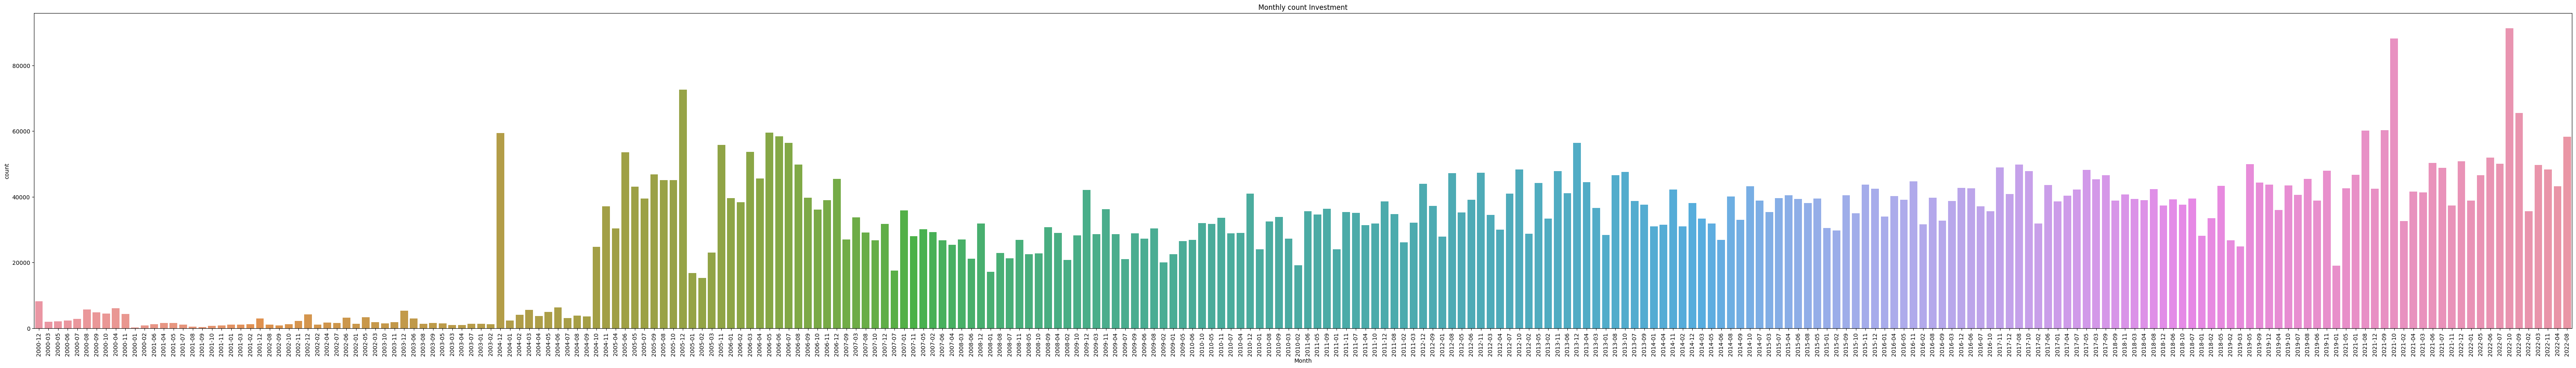

In [20]:
plt.figure(figsize=(80,10))
sns.countplot(data=df,x='Month')
plt.title('Monthly count Investment')
plt.xticks(rotation=90)
plt.show()

# Sector vertical

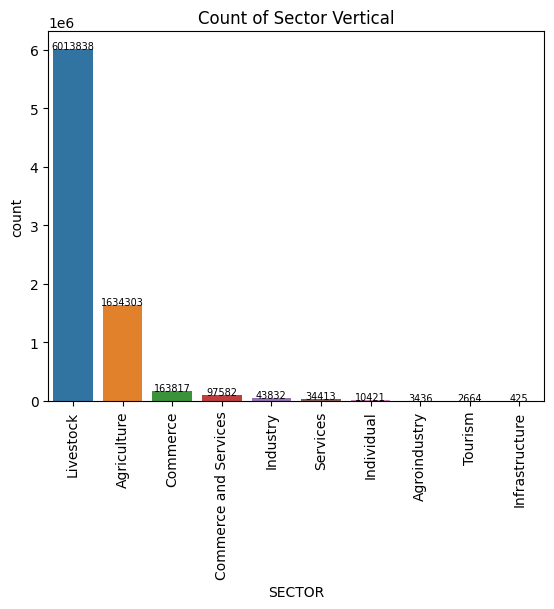

In [21]:
industry = df['SECTOR'].value_counts().head(10).reset_index(name='count')
industry.columns = ['SECTOR','count']
g = sns.barplot(data=industry,x='SECTOR',y='count')
for v in industry.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count+2,s=str(round(v.count, 2)), size=7, ha="center")
plt.title('Count of Sector Vertical')
plt.xticks(rotation=90)
plt.show()

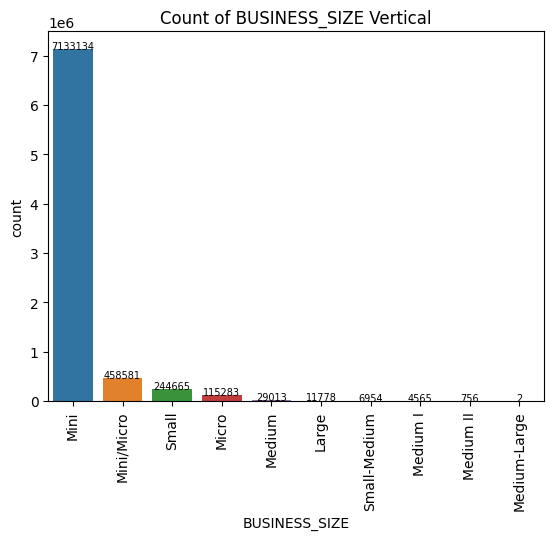

In [22]:
industry = df['BUSINESS_SIZE'].value_counts().head(10).reset_index(name='count')
industry.columns = ['BUSINESS_SIZE','count']
g = sns.barplot(data=industry,x='BUSINESS_SIZE',y='count')
for v in industry.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count+2,s=str(round(v.count, 2)), size=7, ha="center")
plt.title('Count of BUSINESS_SIZE Vertical')
plt.xticks(rotation=90)
plt.show()

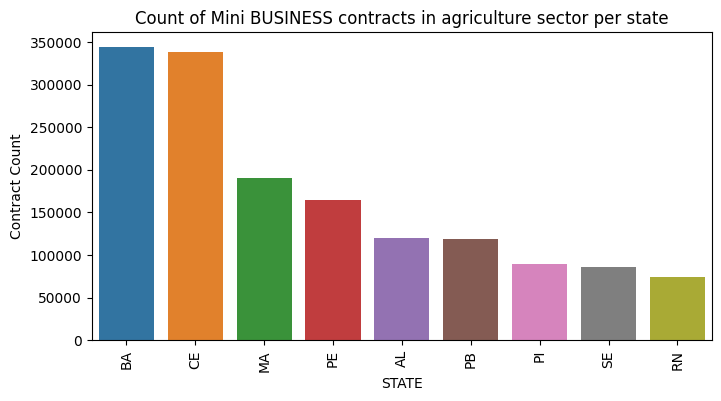

In [23]:
filtered_df = df[(df['BUSINESS_SIZE'] == 'Mini') & (df['SECTOR'] == 'Agriculture')]

state_counts = filtered_df['STATE'].value_counts().reset_index()
state_counts.columns = ['STATE', 'Contract Count']

plt.figure(figsize=(8, 4))
sns.barplot(data=state_counts, x='STATE', y='Contract Count')
plt.title('Count of Mini BUSINESS contracts in agriculture sector per state')
plt.xticks(rotation=90)

plt.show()

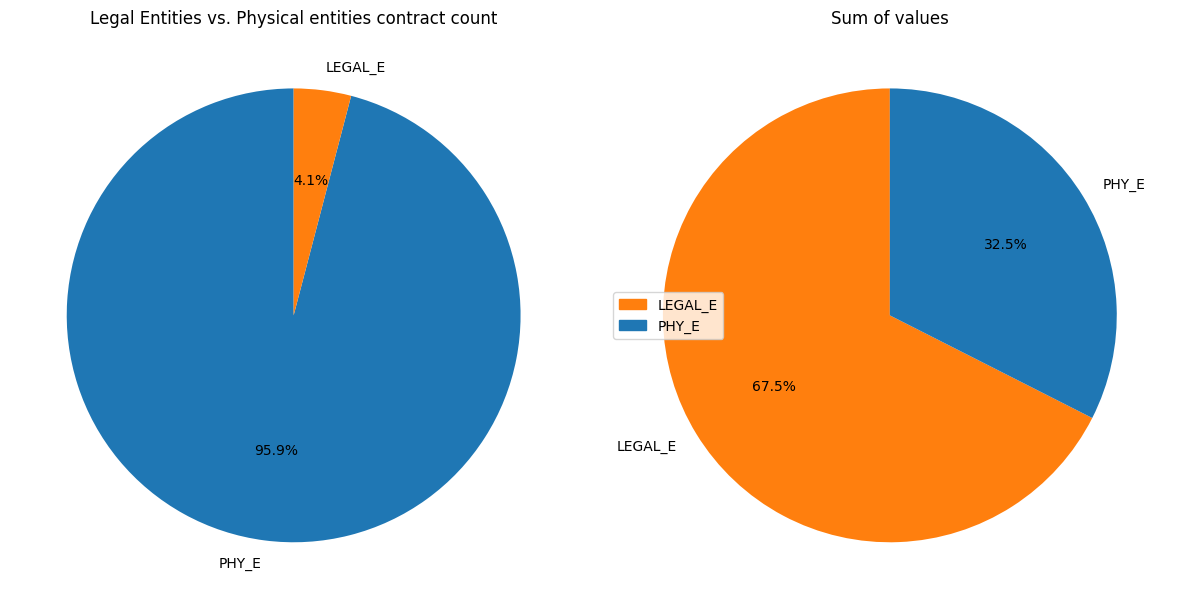

In [24]:
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)

legal_phy_counts = df['LEGALENTITY_PHYSICALENTITY'].value_counts()
labels = legal_phy_counts.index
sizes = legal_phy_counts.values
colors = ['#1f77b4', '#ff7f0e']  # Azul e Laranja

patches, texts, autotexts = ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Legal Entities vs. Physical entities contract count')

legal_sum = df[df['LEGALENTITY_PHYSICALENTITY'] == 'LEGAL_E']['CONTRACT_VALUE'].sum()
phy_sum = df[df['LEGALENTITY_PHYSICALENTITY'] == 'PHY_E']['CONTRACT_VALUE'].sum()

legal_sum_billion = legal_sum / 1_000_000_000
phy_sum_billion = phy_sum / 1_000_000_000

ax2 = plt.subplot(1, 2, 2)
labels = ['LEGAL_E', 'PHY_E']
sizes = [legal_sum_billion, phy_sum_billion]
colors = ['#ff7f0e', '#1f77b4']  # Azul (mesma cor do primeiro gráfico) e Laranja

patches, texts, autotexts = ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('Sum of values')

legend_labels = ['LEGAL_E', 'PHY_E']
legend_colors = ['#ff7f0e', '#1f77b4']  # Azul (mesma cor do primeiro gráfico) e Laranja
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax2.legend(legend_patches, legend_labels, loc='center left')

plt.tight_layout()

plt.show()



In [25]:
total_contract_value = df['CONTRACT_VALUE'].sum()
print(f'Total sum of CONTRACT_VALUE: {total_contract_value}')

Total sum of CONTRACT_VALUE: 198565385732.22018


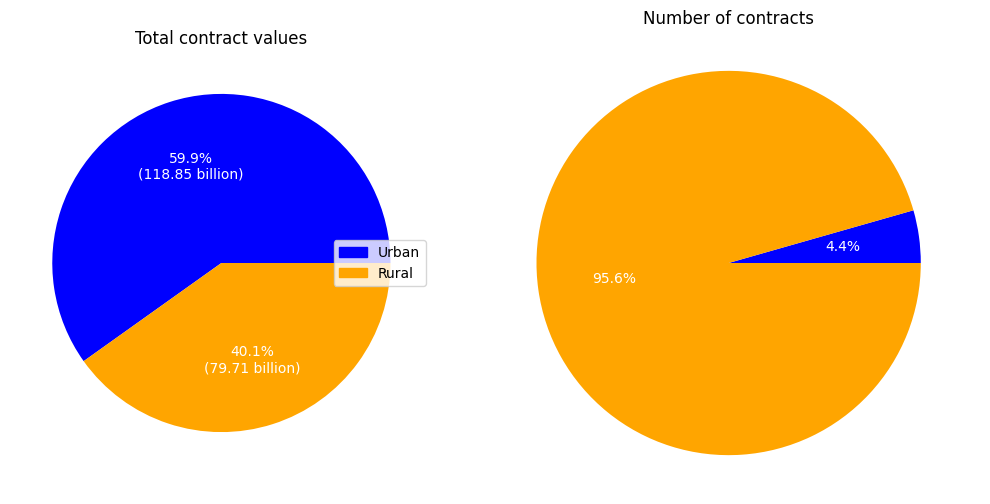

In [26]:
urban_df = df[df['URBAN_RURAL'] == 'Urban']
rural_df = df[df['URBAN_RURAL'] == 'Rural']

urban_sum = urban_df['CONTRACT_VALUE'].sum()
rural_sum = rural_df['CONTRACT_VALUE'].sum()

urban_sum_billion = urban_sum / 1_000_000_000
rural_sum_billion = rural_sum / 1_000_000_000

labels1 = ['Urban', 'Rural']
sizes1 = [urban_sum_billion, rural_sum_billion]
total_sum1 = urban_sum_billion + rural_sum_billion
colors1 = ['blue', 'orange']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

patches1, texts1, autotexts1 = ax1.pie(sizes1, labels=labels1, colors=colors1, autopct=lambda p: f'{p:.1f}%\n({p * total_sum1 / 100:.2f} billion)', textprops={'color': 'white'})
ax1.set_title('Total contract values')

legend_labels1 = ['Urban', 'Rural']
legend_colors1 = ['blue', 'orange']
legend_patches1 = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors1]
ax1.legend(legend_patches1, legend_labels1, loc='center right')

count_urban = urban_df.shape[0]
count_rural = rural_df.shape[0]

total_count = count_urban + count_rural
percent_urban = (count_urban / total_count) * 100
percent_rural = (count_rural / total_count) * 100

labels2 = ['Urban', 'Rural']
sizes2 = [percent_urban, percent_rural]
colors2 = ['blue', 'orange']

patches2, texts2, autotexts2 = ax2.pie(sizes2, labels=labels2, colors=colors2, autopct='%1.1f%%', textprops={'color': 'white'})
ax2.set_title('Number of contracts')

plt.axis('equal')  

plt.show()


# Geospatial view

In [27]:
city_dict_df = pd.read_csv(filename_cities)

In [28]:
city_dict_df.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo


In [29]:
city_dict_df.drop(['capital', 'codigo_uf', 'ddd', 'fuso_horario', 'siafi_id'], axis=1, inplace=True)
city_dict_df.rename(columns={'codigo_ibge': 'MUNICIPALITY_CODE'}, inplace=True)

In [30]:
city_dict_df.head()

,MUNICIPALITY_CODE,nome,latitude,longitude
0,5200050,Abadia de Goiás,-16.75730,-49.4412
1,3100104,Abadia dos Dourados,-18.48310,-47.3916
2,5200100,Abadiânia,-16.19700,-48.7057
3,3100203,Abaeté,-19.15510,-45.4444
4,1500107,Abaetetuba,-1.72183,-48.8788


In [31]:
df_merged = pd.merge(df, city_dict_df, on='MUNICIPALITY_CODE')

In [44]:
contracts_count = df_merged['MUNICIPALITY_CODE'].value_counts()

contracts_count_df = pd.DataFrame({'MUNICIPALITY_CODE': contracts_count.index, 'CONTRACTS_COUNT': contracts_count.values})

contracts_count_df.sort_values(by='MUNICIPALITY_CODE', inplace=True)

print(contracts_count_df)

      MUNICIPALITY_CODE  CONTRACTS_COUNT
138           2100055.0             9998
1440          2100105.0             1612
723           2100154.0             4133
1314          2100204.0             2017
450           2100303.0             5691
...                 ...              ...
128           2933307.0            10244
1571          2933406.0             1219
1522          2933455.0             1353
957           2933505.0             3214
469           2933604.0             5567

[1794 rows x 2 columns]


In [50]:
contracts_count_df.reset_index(drop=True, inplace=True)
merged_df = contracts_count_df.merge(city_dict_df, on='MUNICIPALITY_CODE')
print(merged_df)

      MUNICIPALITY_CODE  CONTRACTS_COUNT                   nome  latitude  \
0             2100055.0             9998             Açailândia  -4.94714   
1             2100105.0             1612           Afonso Cunha  -4.13631   
2             2100154.0             4133  Água Doce do Maranhão  -2.84048   
3             2100204.0             2017              Alcântara  -2.39574   
4             2100303.0             5691          Aldeias Altas  -4.62621   
...                 ...              ...                    ...       ...   
1789          2933307.0            10244   Vitória da Conquista -14.86150   
1790          2933406.0             1219                 Wagner -12.28190   
1791          2933455.0             1353              Wanderley -12.11440   
1792          2933505.0             3214    Wenceslau Guimarães -13.69080   
1793          2933604.0             5567            Xique-Xique -10.82300   

      longitude  
0      -47.5004  
1      -43.3275  
2      -42.1189  
3  

In [52]:
map = folium.Map(location=[-5.0, -40.0], zoom_start=6)

def color_scale(count):
    if count < 1000:
        return 'blue'
    elif count < 3000:
        return 'green'
    elif count < 5000:
        return 'orange'
    else:
        return 'red'

for index, row in merged_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Contratos: {row['CONTRACTS_COUNT']}",
        icon=folium.Icon(color=color_scale(row['CONTRACTS_COUNT']), icon='cloud')
    ).add_to(mapa)

mapa